# Group C | Part 0 - Data Selection

link to yelp documentation: https://www.yelp.com/dataset/download

In [8]:
import os 
import numpy as np
import pandas as pd
import json
import gdown
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

## Data Exploration

In [10]:
def remove_outliers_from_ds(ds: pd.Series, k: int = 1.5) -> pd.Series:
    # Calculate the Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = ds.quantile(0.25)
    Q3 = ds.quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries (k * IQR rule)
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Return the filtered Series with outliers removed
    return ds[(ds >= lower_bound) & (ds <= upper_bound)]


def show_distribution(df: pd.DataFrame, target_col: str, type: str, remove_outliers: bool=False) -> None:
    grouped_df = df.groupby(target_col).size().reset_index(name='count')

    if remove_outliers:
        non_outliers = remove_outliers_from_ds(grouped_df["count"], k=1.5).values
        grouped_df = grouped_df[grouped_df["count"].isin(non_outliers)]

    if type.lower() == "histogram":
        sns.histplot(data=grouped_df, x="count")
    elif type.lower() == "boxplot":
        sns.boxplot(data=grouped_df, x="count")
    else:
        raise ValueError("Type not permited")
    
    plt.title(f"{target_col} Reviews Distribution")
    plt.show()

In [11]:
Philadelphia_reviews = pd.read_csv('/Users/mac/Downloads/ADC-MECD/data/Philadelphia_reviews.csv')

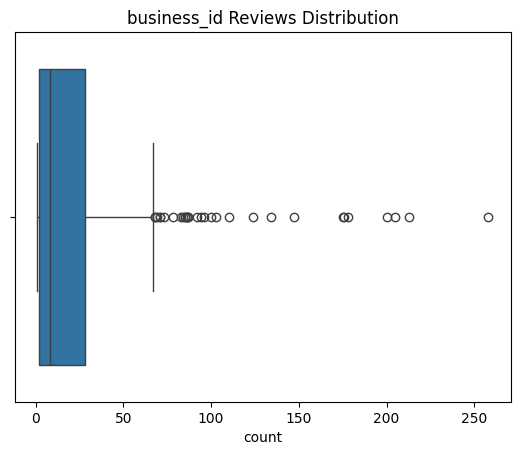

In [12]:
show_distribution(Philadelphia_reviews, target_col="business_id", type="boxplot")

### Business

Contains business data including location data, attributes, and categories

- business_id: string, 22 character unique string business id,
- name: string, the business's name,
- address: string, the full address of the business,
- city: string, the city
- state: string, 2 character state code, if applicable
- postal code: string, the postal code,
- latitude: float, latitude,
- longitude: float, longitude,
- stars: float, star rating, rounded to half-stars,
- review_count: integer, number of reviews,
- is_open: integer, 0 or 1 for closed or open, respectively,
- attributes: object, business attributes to values. note: some attribute values might be objects

        "RestaurantsTakeOut": true,
        "BusinessParking": {
            "garage": false,
            "street": true,
            "validated": false,
            "lot": false,
            "valet": false
        },

- categories: an array of strings of business categories

        "Mexican",
        "Burgers",
        "Gastropubs"

- hours: an object of key day to value hours, hours are using a 24hr clock


In [2]:
# TODO

### Review

Contains full review text data including the user_id that wrote the review and the business_id the review is written for.

- **review_id**: string, 22 character unique review id
- **user_id**: string, 22 character unique user id, maps to the user in user.json
- **business_id**: string, 22 character business id, maps to business in business.json
- **stars**: integer, star rating
- **date**: string, date formatted YYYY-MM-DD
- **text**: string, the review itself
- **useful**: integer, number of useful votes received
- **funny**: integer, number of funny votes received
- **cool**: integer, number of cool votes received

In [3]:
# review_dataframe = pd.read_csv('/Users/mac/Downloads/ADC-MECD/data/review_dataframe.csv')
# business_dataframe = pd.read_csv('/Users/mac/Downloads/ADC-MECD/data/business_dataframe.csv')

In [4]:
# # Merge review_dataframe with business DataFrame on 'business_id'
# merged_data = pd.merge(review_dataframe, business_dataframe, on='business_id', how='inner')
# print('Columns in the merged DataFrame:', merged_data.columns)

In [5]:
# merged_data.shape

In [6]:
# Filter the merged data to select only reviews where:
# - The business is still open (open == 1)
# - The number of reviews (review_count) is not null
# - The number of reviewers (user_id) is not null

# filtered_data = merged_data[
#     (merged_data['is_open'] == 1) &          # Business is open
#     (merged_data['review_id'].notnull()) &   # Review ID is not null
#     (merged_data['user_id'].notnull())       # User ID is not null
# ]


# print(f'Filtered data shape: {filtered_data.shape}')
# filtered_data

In [7]:
filtered_data= pd.read_csv('/Users/mac/Downloads/ADC-MECD/data/filtered_review.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mac/Downloads/ADC-MECD/data/filtered_review.csv'

In [4]:
# Check for missing values
missing_info = filtered_data.isnull().sum()

missing_info_df = pd.DataFrame({
    'Missing Values': missing_info,
    'Percentage': (missing_info / len(filtered_data)) * 100
}).sort_values(by='Missing Values', ascending=False)

# Display the missing values summary
print(missing_info_df)

              Missing Values  Percentage
hours                  85382    4.447178
attributes             51359    2.675068
address                22934    1.194533
categories               219    0.011407
postal_code              122    0.006354
state                      0    0.000000
is_open                    0    0.000000
review_count               0    0.000000
stars_y                    0    0.000000
longitude                  0    0.000000
latitude                   0    0.000000
review_id                  0    0.000000
user_id                    0    0.000000
name                       0    0.000000
date                       0    0.000000
text                       0    0.000000
cool                       0    0.000000
funny                      0    0.000000
useful                     0    0.000000
stars_x                    0    0.000000
business_id                0    0.000000
city                       0    0.000000


In [5]:
filtered_data

review_id                 user_id  \
0        KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA   
1        VJxlBnJmCDIy8DFG0kjSow  Iaee7y6zdSB3B-kRCo4z1w   
2        S6pQZQocMB1WHMjTRbt77A  ejFxLGqQcWNLdNByJlIhnQ   
3        WqgTKVqWVHDHjnjEsBvUgg  f7xa0p_1V9lx53iIGN5Sug   
4        M0wzFFb7pefOPcxeRVbLag  dCooFVCk8M1nVaQqcfTL3Q   
...                         ...                     ...   
1919909  GWRc2NUvHi_AhQrRe40Y-A  NoTUqaa3T7nfpNl6YUaKfA   
1919910  4dmhJNRcz6GsnX2TVl-qOw  tglSRh19g-cDh4XEBGWfeg   
1919911  yt1wudnexbu9g9QOZWg68Q  neH0oi54pnKwbK_iMq_oUw   
1919912  ibMFQyyEQfWKiu6wnkWmwQ  3_VHh7W9H-a6LpM6Yd0laA   
1919913  0U7lZnbi9MggZBB_C7DaMg  znmJ_d79X3c85ZYlJVc8-A   

                    business_id  stars_x  useful  funny  cool  \
0        XQfwVwDr-v0ZS3_CbbE5Xw        3       0      0     0   
1        XQfwVwDr-v0ZS3_CbbE5Xw        2       0      0     0   
2        XQfwVwDr-v0ZS3_CbbE5Xw        4       2      0     1   
3        XQfwVwDr-v0ZS3_CbbE5Xw        3       0      0     0   
4        XQfwVwDr-v0ZS3_CbbE5Xw        2       0      0     0   
...                         ...      ...     ...    ...   ...   
1919909  SAp1Nk3XLbQ-zeJKyASICQ        4       1      1     1   
1919910  SAp1Nk3XLbQ-zeJKyASICQ        5       0      0     0   
1919911  SAp1Nk3XLbQ-zeJKyASICQ        1       0      0     0   
1919912  SAp1Nk3XLbQ-zeJKyASICQ        2       0      0     0   
1919913  SAp1Nk3XLbQ-zeJKyASICQ        1       0      0     0   

                                                      text  \
0        If you decide to eat here, just be aware it is...   
1        This is the second time we tried turning point...   
2        The place is cute and the staff was very frien...   
3        We came on a Saturday morning after waiting a ...   
4        Mediocre at best. The decor is very nice, and ...   
...                                                    ...   
1919909  Typical Cheesecake Factory with the tables tha...   
1919910  Just a great experience every time we eat here...   
1919911  Food was great as was the service. Left a 22+ ...   
1919912  This applies to to go orders. I've eaten at Ch...   
1919913  Honestly I loved the place, thought the food w...   

                        date                                name  ... state  \
0        2018-07-07 22:09:11        Turning Point of North Wales  ...    PA   
1        2017-05-13 17:06:55        Turning Point of North Wales  ...    PA   
2        2017-08-08 00:58:18        Turning Point of North Wales  ...    PA   
3        2017-11-19 02:20:23        Turning Point of North Wales  ...    PA   
4        2017-09-09 17:49:47        Turning Point of North Wales  ...    PA   
...                      ...                                 ...  ...   ...   
1919909  2020-01-14 18:07:42  The Cheesecake Factory - Nashville  ...    TN   
1919910  2021-09-07 15:37:38  The Cheesecake Factory - Nashville  ...    TN   
1919911  2021-05-16 07:02:09  The Cheesecake Factory - Nashville  ...    TN   
1919912  2020-04-27 20:39:25  The Cheesecake Factory - Nashville  ...    TN   
1919913  2021-05-05 10:32:32  The Cheesecake Factory - Nashville  ...    TN   

        postal_code   latitude  longitude  stars_y  review_count  is_open  \
0             19454  40.210196 -75.223639      3.0           169        1   
1             19454  40.210196 -75.223639      3.0           169        1   
2             19454  40.210196 -75.223639      3.0           169        1   
3             19454  40.210196 -75.223639      3.0           169        1   
4             19454  40.210196 -75.223639      3.0           169        1   
...             ...        ...        ...      ...           ...      ...   
1919909       37215  36.107731 -86.814896      3.5           415        1   
1919910       37215  36.107731 -86.814896      3.5           415        1   
1919911       37215  36.107731 -86.814896      3.5           415        1   
1919912       37215  36.107731 -86.814896      3.5           415    

In [6]:
filtered_data['date'] = pd.to_datetime(filtered_data['date'])

filtered_data['year'] = filtered_data['date'].dt.year

In [7]:
aggregated_data = filtered_data.groupby(['city', 'year']).agg({
    'review_id': pd.Series.nunique,  # Count of distinct reviews (review_id)
    'user_id': pd.Series.nunique,    # Count of distinct reviewers (user_id)
    'business_id': pd.Series.nunique, # Count of distinct businesses (business_id)
    'stars_x': 'mean',               # Average of stars from the review DataFrame
    'useful': 'sum',                 # Sum of useful votes
    'funny': 'sum',                  # Sum of funny votes
    'cool': 'sum'                    # Sum of cool votes
}).reset_index()


select_data=aggregated_data.sort_values('business_id', ascending=False).head(50)

In [8]:
select_data

city  year  review_id  user_id  business_id   stars_x  useful  \
6017  Philadelphia  2019      31639    21047         2496  3.853061   32965   
6016  Philadelphia  2018      31046    20609         2403  3.844650   34264   
6015  Philadelphia  2017      28871    19251         2257  3.856881   32645   
6018  Philadelphia  2020      16697    11755         2218  3.852848   19163   
6019  Philadelphia  2021      18607    12637         2195  3.776213   19319   
6014  Philadelphia  2016      27256    18052         2167  3.837614   32976   
6013  Philadelphia  2015      25756    16479         1969  3.826914   31328   
8176        Tucson  2019      15969    10632         1833  3.756841   15239   
8175        Tucson  2018      15983    10429         1785  3.831508   17186   
7819         Tampa  2019      17772    12544         1770  3.809532   22893   
6012  Philadelphia  2014      22285    13513         1757  3.822930   31580   
8177        Tucson  2020      11152     7587         1737  3.753318   10620   
8178        Tucson  2021      12252     8528         1702  3.671237    9658   
7821         Tampa  2021      14118    10419         1688  3.670917   12774   
7818         Tampa  2018      17395    11914         1666  3.830181   20877   
7820         Tampa  2020      11942     8547         1658  3.834031   13817   
8174        Tucson  2017      12700     8482         1635  3.838583   13953   
6011  Philadelphia  2013      18341    10345         1544  3.799793   25251   
7817         Tampa  2017      14078    10022         1523  3.776105   14137   
8173        Tucson  2016      11067     7323         1506  3.808349   14268   
3540  Indianapolis  2019      15602     9426         1452  3.870594   15179   
7816         Tampa  2016      14032     9569         1403  3.816918   17035   
3542  Indianapolis  2021      11137     6730         1370  3.843225   11886   
3539  Indianapolis  2018      14341     8465         1351  3.933129   12019   
8172        Tucson  2015       9323     6075         1327  3.770138   14470   
3541  Indianapolis  2020       9614     5900         1319  3.892136   10000   
6010  Philadelphia  2012      14538     7950         1288  3.768125   19771   
5170     Nashville  2019      19458    14259         1267  3.859903   14361   
7815         Tampa  2015      12022     7624         1261  3.813675   17068   
3538  Indianapolis  2017      12696     7452         1255  3.945573   10712   
5172     Nashville  2021      14911    10861         1207  3.844209   12076   
5169     Nashville  2018      18323    13369         1185  3.868908   12701   
6382          Reno  2019      13812     9292         1170  3.846221   19019   
3537  Indianapolis  2016      11281     6678         1166  3.907987   11801   
5257   New Orleans  2019      26898    18833         1163  4.015503   21222   
5171     Nashville  2020      10759     7881         1161  3.962915    9798   
8171        Tucson  2014       7402     4580         1145  3.807620   13218   
6009  Philadelphia  2011      12624     6677         1144  3.784141   17995   
5256   New Orleans  2018      27725    19311         1128  4.044905   24771   
6384          Reno  2021      11127     7834         1106  3.725802   15404   
6383          Reno  2020      10205     7179         1098  3.859383   16138   
5168     Nashville  2017      14586    10797         1090  3.822501   10477   
6381          Reno  2018      13492     9216         1076  3.901720   18761   
5255   New Orleans  2017      22264    15571         1048  4.015092   20760   
3536  Indianapolis  2015       9283     5472         1047  3.859097   11773   
5258   New Orleans  2020      12063     8272         1029  4.067562   12079   
5167     Nashville  2016      12837     9438         1021  3.855340   12307   
5259   New Orleans  2021      14311     9858         1009  3.999790   12707   
6380          Reno  2017      12071     8114         1004  3.879215   19389   
7814         Tampa  2014       7419     4569          995  3.758

**Analysis and Insights:**

- Analisar reviews e user com review por ano e por cidade
- cidade com mais open business
- cidade e average rate dos business
- wordcloud OF REVIEWS

- Top Cities by Number of Reviews

- Star Rating Distribution by City: Boxplots show how ratings are spread across cities

- Average Useful Votes by City: Useful votes are a good proxy for review engagement, showing which cities have the most valuable user feedback.

- Stars vs. Useful Votes: A scatter plot helps to visualize the relationship between star ratings and useful votes

In [9]:
agg_df=aggregated_data
agg_df.describe()

year     review_id       user_id  business_id      stars_x  \
count  9284.000000   9284.000000   9284.000000  9284.000000  9284.000000   
mean   2015.430202    206.798147    153.728888    27.270681     3.631601   
std       4.200611   1373.475086    926.696439   127.538417     0.883734   
min    2005.000000      1.000000      1.000000     1.000000     1.000000   
25%    2012.000000      3.000000      3.000000     1.000000     3.250000   
50%    2016.000000     12.000000     11.000000     4.000000     3.714286   
75%    2019.000000     60.000000     56.000000    14.000000     4.088959   
max    2022.000000  31639.000000  21047.000000  2496.000000     5.000000   

             useful         funny          cool  
count   9284.000000   9284.000000   9284.000000  
mean     239.223611     65.943020    103.895088  
std     1559.497398    453.148998    748.259267  
min        0.000000      0.000000      0.000000  
25%        3.000000      0.000000      1.000000  
50%       15.000000      4.000000      4.000000  
75%       74.000000     20.000000     23.000000  
max    34264.000000  10112.000000  15543.000000

In [10]:
# 2. Sort by business_count and take the top 50 cities
top_50_cities = agg_df.sort_values('business_id', ascending=False).head(300)
top_50_cities

city  year  review_id  user_id  business_id   stars_x  useful  \
6017   Philadelphia  2019      31639    21047         2496  3.853061   32965   
6016   Philadelphia  2018      31046    20609         2403  3.844650   34264   
6015   Philadelphia  2017      28871    19251         2257  3.856881   32645   
6018   Philadelphia  2020      16697    11755         2218  3.852848   19163   
6019   Philadelphia  2021      18607    12637         2195  3.776213   19319   
...             ...   ...        ...      ...          ...       ...     ...   
8633  Wesley Chapel  2019       1132      949          124  3.784452    1306   
3689         Kenner  2019        887      816          124  3.468997     813   
4721       Metairie  2011        541      346          124  3.658041    1221   
8635  Wesley Chapel  2021        992      822          122  3.641129    1228   
2429        Fishers  2021       1212      972          121  3.803630     951   

      funny   cool  
6017   9060  15142  
6016   8322  15543  
6015  10112  14350  
6018   5059   9549  
6019   4912   9943  
...     ...    ...  
8633    189    639  
3689    218    405  
4721    405    411  
8635    341    905  
2429    104    310  

[300 rows x 9 columns]

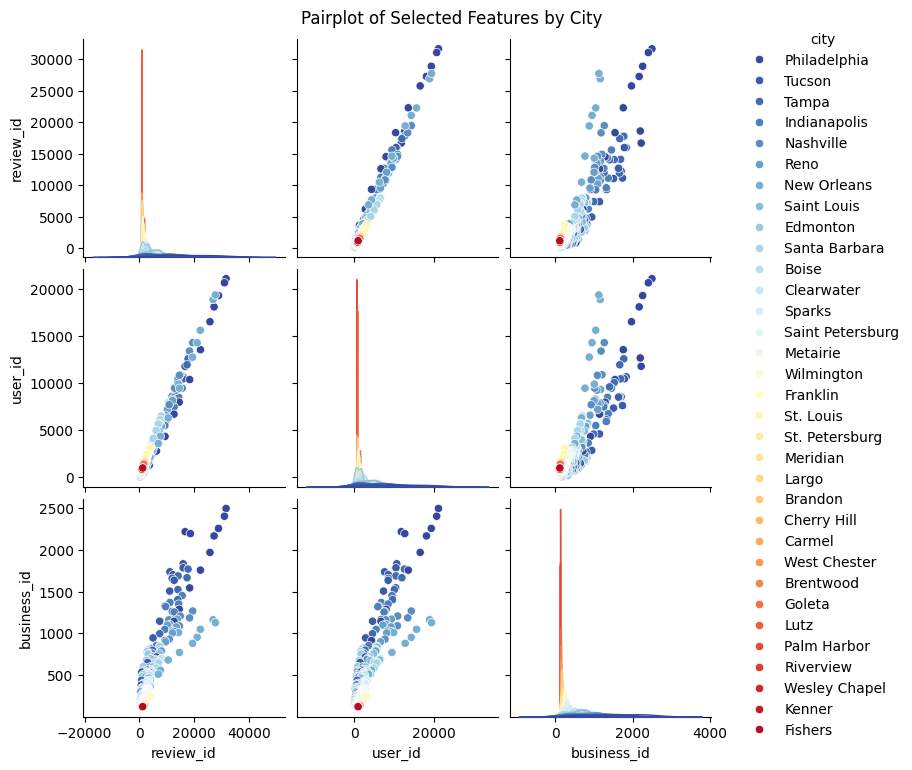

In [11]:
num_unique_genres = top_50_cities['city'].nunique()

# Define a custom color palette with a sufficient number of distinct colors and reverse the order
custom_palette = sns.color_palette("RdYlBu", n_colors=num_unique_genres)[::-1]

# Create the pairplot with the custom color palette
pair_plot = sns.pairplot(top_50_cities, vars=['review_id', 'user_id', 'business_id'], hue='city', palette=custom_palette)

# Add a title to the pairplot
pair_plot.fig.suptitle("Pairplot of Selected Features by City", y=1.02)

# Show the pairplot
plt.show()

In [12]:
agg_df_city = filtered_data.groupby(['city']).agg({
    'review_id': pd.Series.nunique,  # Count of distinct reviews (review_id)
    'user_id': pd.Series.nunique,    # Count of distinct reviewers (user_id)
    'business_id': pd.Series.nunique, # Count of distinct businesses (business_id)
    'stars_x': 'mean',               # Average of stars from the review DataFrame
    'useful': 'sum',                 # Sum of useful votes
    'funny': 'sum',                  # Sum of funny votes
    'cool': 'sum'                    # Sum of cool votes
}).reset_index()

agg_df_city

city  review_id  user_id  business_id   stars_x  useful  \
0               AMBLER         10        9            1  3.000000      46   
1             Abington        811      734           37  3.875462     834   
2    Abington Township        254      244            2  3.814961     259   
3               Affton        466      426           12  3.849785     485   
4                Aldan         30       30            2  3.833333      19   
..                 ...        ...      ...          ...       ...     ...   
841             sparks         14       12            1  3.285714      28   
842            telford          9        9            1  3.000000      13   
843             tucson         10       10            1  4.600000      20   
844         wilmington         62       61            1  4.161290      32   
845             ​Largo         15       15            1  4.800000      10   

     funny  cool  
0        6     3  
1      231   290  
2      106   156  
3      138   201  
4        6     3  
..     ...   ...  
841      2     9  
842      2     1  
843      0     0  
844      6     3  
845      2     4  

[846 rows x 8 columns]

In [13]:
agg_df_city['avg_reviews_per_business'] = agg_df_city['review_id'] / agg_df_city['business_id']
agg_df_city['avg_review_per_users'] = agg_df_city['review_id'] / agg_df_city['user_id']
agg_df_city

city  review_id  user_id  business_id   stars_x  useful  \
0               AMBLER         10        9            1  3.000000      46   
1             Abington        811      734           37  3.875462     834   
2    Abington Township        254      244            2  3.814961     259   
3               Affton        466      426           12  3.849785     485   
4                Aldan         30       30            2  3.833333      19   
..                 ...        ...      ...          ...       ...     ...   
841             sparks         14       12            1  3.285714      28   
842            telford          9        9            1  3.000000      13   
843             tucson         10       10            1  4.600000      20   
844         wilmington         62       61            1  4.161290      32   
845             ​Largo         15       15            1  4.800000      10   

     funny  cool  avg_reviews_per_business  avg_review_per_users  
0        6     3                 10.000000              1.111111  
1      231   290                 21.918919              1.104905  
2      106   156                127.000000              1.040984  
3      138   201                 38.833333              1.093897  
4        6     3                 15.000000              1.000000  
..     ...   ...                       ...                   ...  
841      2     9                 14.000000              1.166667  
842      2     1                  9.000000              1.000000  
843      0     0                 10.000000              1.000000  
844      6     3                 62.000000              1.016393  
845      2     4                 15.000000              1.000000  

[846 rows x 10 columns]

In [14]:
top_50_cities = agg_df_city.sort_values('business_id', ascending=False).head(50)

top_50_cities = top_50_cities.rename(columns={
    'review_id': 'total_review',
    'user_id': 'total_user',
    'business_id': 'total_business'
})


top_50_cities

city  total_review  total_user  total_business   stars_x  \
529      Philadelphia        269432      126119            3253  3.823737   
724            Tucson        111125       53218            2292  3.778997   
691             Tampa        120082       64218            2219  3.787745   
308      Indianapolis        103097       45289            1800  3.891898   
452         Nashville        126221       74507            1643  3.852663   
562              Reno         94255       48543            1449  3.814800   
460       New Orleans        191419      110230            1445  3.996280   
184          Edmonton         26780        9705            1205  3.662136   
597       Saint Louis         68885       37153            1087  3.943369   
607     Santa Barbara         68928       47567             915  4.023140   
56              Boise         28743       17312             720  3.838152   
117        Clearwater         22274       16057             544  3.753345   
643            Sparks         21474       13321             421  3.621077   
414          Metairie         19500       12836             413  3.722564   
599  Saint Petersburg         19275       13692             395  4.003891   
800        Wilmington         10427        7190             344  3.595569   
224          Franklin         15497       10682             341  3.671162   
665         St. Louis         19583       14143             322  3.834704   
412          Meridian         10144        6844             281  3.660883   
668    St. Petersburg         15203       11258             279  3.973426   
347             Largo          6623        4984             247  3.719311   
88             Carmel         10782        6670             236  3.851976   
65            Brandon         11592        7983             230  3.593254   
105       Cherry Hill          9331        6920             223  3.474654   
776      West Chester          7085        5128             216  3.736909   
67          Brentwood          8174        6656             204  3.765109   
250            Goleta         13705       10242             180  3.788034   
503       Palm Harbor          5028        3851             169  3.696698   
371              Lutz          5267        4047             167  3.742928   
158        Doylestown          4179        3156             157  3.646327   
323            Kenner          6143        4943             156  3.524174   
772     Wesley Chapel          7016        4799             156  3.716648   
574         Riverview          6191        4328             155  3.478275   
260         Greenwood          4150        2853             152  3.504096   
538     Pinellas Park          5236        4223             148  3.578113   
462   New Port Richey          3226        2402             144  3.605704   
215           Fishers          7621        5210             143  3.763942   
163           Dunedin          6653        4819             121  3.965880   
42           Bensalem          3710        2823             117  3.307547   
328   King of Prussia          6175        5021             117  3.534251   
286    Hendersonville          3917        2775             112  3.626500   
476        Norristown          2738        2192             102  3.728634   
467            Newark          4506        3582             101  3.578118   
202             Exton          4385        3277             100  3.356214   
344          Lansdale          3294        2556             100  3.598664   
656          St Louis          7405        5937              99  3.805537   
432      Mount Laurel          3789        3097              99  3.405648   
660     St Petersburg          4777        4067              97  3.718024   
648       Spring Hill          1963        1430              95  3.567499   
552         Pottstown          2313        1728              95  3.499351   

     useful   funny    cool  avg_reviews_per_business  avg_review_per_users  
529  342814

In [15]:
top_50_cities_reviews_per_business = top_50_cities.sort_values('avg_reviews_per_business', ascending=False).head(50)
top_50_cities_reviews_per_business

city  total_review  total_user  total_business   stars_x  \
460       New Orleans        191419      110230            1445  3.996280   
529      Philadelphia        269432      126119            3253  3.823737   
452         Nashville        126221       74507            1643  3.852663   
250            Goleta         13705       10242             180  3.788034   
607     Santa Barbara         68928       47567             915  4.023140   
656          St Louis          7405        5937              99  3.805537   
562              Reno         94255       48543            1449  3.814800   
597       Saint Louis         68885       37153            1087  3.943369   
665         St. Louis         19583       14143             322  3.834704   
308      Indianapolis        103097       45289            1800  3.891898   
163           Dunedin          6653        4819             121  3.965880   
668    St. Petersburg         15203       11258             279  3.973426   
691             Tampa        120082       64218            2219  3.787745   
215           Fishers          7621        5210             143  3.763942   
328   King of Prussia          6175        5021             117  3.534251   
643            Sparks         21474       13321             421  3.621077   
65            Brandon         11592        7983             230  3.593254   
660     St Petersburg          4777        4067              97  3.718024   
599  Saint Petersburg         19275       13692             395  4.003891   
724            Tucson        111125       53218            2292  3.778997   
414          Metairie         19500       12836             413  3.722564   
88             Carmel         10782        6670             236  3.851976   
224          Franklin         15497       10682             341  3.671162   
772     Wesley Chapel          7016        4799             156  3.716648   
467            Newark          4506        3582             101  3.578118   
202             Exton          4385        3277             100  3.356214   
105       Cherry Hill          9331        6920             223  3.474654   
117        Clearwater         22274       16057             544  3.753345   
67          Brentwood          8174        6656             204  3.765109   
574         Riverview          6191        4328             155  3.478275   
56              Boise         28743       17312             720  3.838152   
323            Kenner          6143        4943             156  3.524174   
432      Mount Laurel          3789        3097              99  3.405648   
412          Meridian         10144        6844             281  3.660883   
538     Pinellas Park          5236        4223             148  3.578113   
286    Hendersonville          3917        2775             112  3.626500   
344          Lansdale          3294        2556             100  3.598664   
776      West Chester          7085        5128             216  3.736909   
42           Bensalem          3710        2823             117  3.307547   
371              Lutz          5267        4047             167  3.742928   
800        Wilmington         10427        7190             344  3.595569   
503       Palm Harbor          5028        3851             169  3.696698   
260         Greenwood          4150        2853             152  3.504096   
476        Norristown          2738        2192             102  3.728634   
347             Largo          6623        4984             247  3.719311   
158        Doylestown          4179        3156             157  3.646327   
552         Pottstown          2313        1728              95  3.499351   
462   New Port Richey          3226        2402             144  3.605704   
184          Edmonton         26780        9705            1205  3.662136   
648       Spring Hill          1963        1430              95  3.567499   

     useful   funny    cool  avg_reviews_per_business  avg_review_per_users  
460  194703

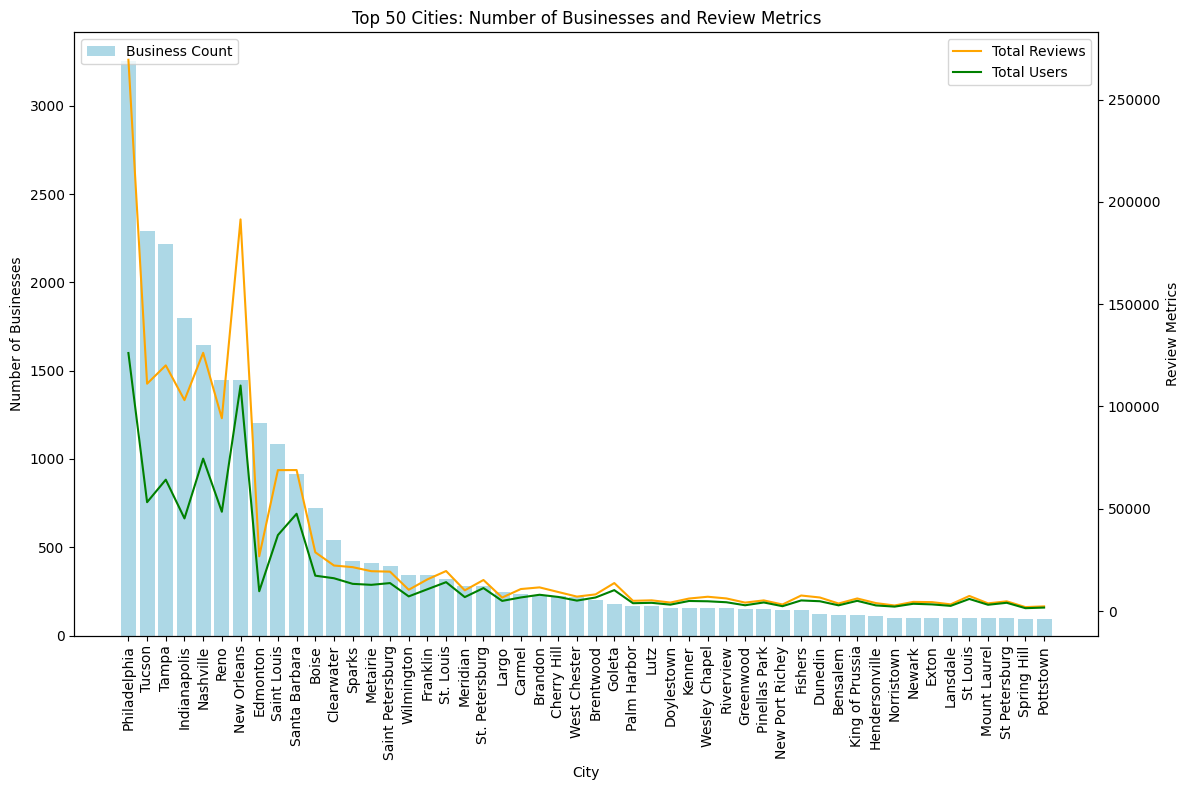

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 3. Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for number of businesses per city
ax1.bar(top_50_cities['city'], top_50_cities['total_business'], color='lightblue', label='Business Count')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Businesses')
ax1.tick_params(axis='x', rotation=90)

# Create a second y-axis for the line plots
ax2 = ax1.twinx()

# Line plot for total reviews, useful, funny, and cool reviews
ax2.plot(top_50_cities['city'], top_50_cities['total_review'], color='orange', label='Total Reviews')
ax2.plot(top_50_cities['city'], top_50_cities['total_user'], color='green', label='Total Users')

ax2.set_ylabel('Review Metrics')

# Add a legend and title
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Top 50 Cities: Number of Businesses and Review Metrics')

# Show the plot
plt.tight_layout()
plt.show()


In [17]:
# Second step: Calculating the MIN/MAX/MEDIAN/MEAN/STD/SUM/VARIANCE/COUNT reviews per business and per user
# Group by city and business_id to get reviews per business
reviews_per_business = filtered_data.groupby(['city', 'business_id']).agg(
    reviews_per_business=('review_id', 'count')
).reset_index()

# Group by city and user_id to get reviews per user
reviews_per_user = filtered_data.groupby(['city', 'user_id']).agg(
    reviews_per_user=('review_id', 'count')
).reset_index()

# Third step: Aggregating to get all metrics (MIN, MAX, MEDIAN, MEAN, STD, SUM, VARIANCE, COUNT) reviews per business and per user for each city
min_max_median_reviews_per_business = reviews_per_business.groupby('city').agg(
    MIN_REVIEWS_per_BUSINESS=('reviews_per_business', 'min'),
    MAX_REVIEWS_per_BUSINESS=('reviews_per_business', 'max'),
    MEDIAN_REVIEWS_per_BUSINESS=('reviews_per_business', 'median'),
    MEAN_REVIEWS_per_BUSINESS=('reviews_per_business', 'mean'),
    STD_REVIEWS_per_BUSINESS=('reviews_per_business', 'std'),
    SUM_REVIEWS_per_BUSINESS=('reviews_per_business', 'sum'),
    VARIANCE_REVIEWS_per_BUSINESS=('reviews_per_business', 'var'),
    COUNT_REVIEWS_per_BUSINESS=('reviews_per_business', 'count')
).reset_index()

min_max_median_reviews_per_user = reviews_per_user.groupby('city').agg(
    MIN_REVIEWS_per_USER=('reviews_per_user', 'min'),
    MAX_REVIEWS_per_USER=('reviews_per_user', 'max'),
    MEDIAN_REVIEWS_per_USER=('reviews_per_user', 'median'),
    MEAN_REVIEWS_per_USER=('reviews_per_user', 'mean'),
    STD_REVIEWS_per_USER=('reviews_per_user', 'std'),
    SUM_REVIEWS_per_USER=('reviews_per_user', 'sum'),
    VARIANCE_REVIEWS_per_USER=('reviews_per_user', 'var'),
    COUNT_REVIEWS_per_USER=('reviews_per_user', 'count')
).reset_index()

# Fourth step: Merging all metrics together into one DataFrame using the city as the join key
top_50_cities = pd.merge(top_50_cities, min_max_median_reviews_per_business, on='city', how='left')
top_50_cities = pd.merge(top_50_cities, min_max_median_reviews_per_user, on='city', how='left')

# Displaying the final DataFrame with all metrics
top_50_cities




city  total_review  total_user  total_business   stars_x  \
0       Philadelphia        269432      126119            3253  3.823737   
1             Tucson        111125       53218            2292  3.778997   
2              Tampa        120082       64218            2219  3.787745   
3       Indianapolis        103097       45289            1800  3.891898   
4          Nashville        126221       74507            1643  3.852663   
5               Reno         94255       48543            1449  3.814800   
6        New Orleans        191419      110230            1445  3.996280   
7           Edmonton         26780        9705            1205  3.662136   
8        Saint Louis         68885       37153            1087  3.943369   
9      Santa Barbara         68928       47567             915  4.023140   
10             Boise         28743       17312             720  3.838152   
11        Clearwater         22274       16057             544  3.753345   
12            Sparks         21474       13321             421  3.621077   
13          Metairie         19500       12836             413  3.722564   
14  Saint Petersburg         19275       13692             395  4.003891   
15        Wilmington         10427        7190             344  3.595569   
16          Franklin         15497       10682             341  3.671162   
17         St. Louis         19583       14143             322  3.834704   
18          Meridian         10144        6844             281  3.660883   
19    St. Petersburg         15203       11258             279  3.973426   
20             Largo          6623        4984             247  3.719311   
21            Carmel         10782        6670             236  3.851976   
22           Brandon         11592        7983             230  3.593254   
23       Cherry Hill          9331        6920             223  3.474654   
24      West Chester          7085        5128             216  3.736909   
25         Brentwood          8174        6656             204  3.765109   
26            Goleta         13705       10242             180  3.788034   
27       Palm Harbor          5028        3851             169  3.696698   
28              Lutz          5267        4047             167  3.742928   
29        Doylestown          4179        3156             157  3.646327   
30            Kenner          6143        4943             156  3.524174   
31     Wesley Chapel          7016        4799             156  3.716648   
32         Riverview          6191        4328             155  3.478275   
33         Greenwood          4150        2853             152  3.504096   
34     Pinellas Park          5236        4223             148  3.578113   
35   New Port Richey          3226        2402             144  3.605704   
36           Fishers          7621        5210             143  3.763942   
37           Dunedin          6653        4819             121  3.965880   
38          Bensalem          3710        2823             117  3.307547   
39   King of Prussia          6175        5021             117  3.534251   
40    Hendersonville          3917        2775             112  3.626500   
41        Norristown          2738        2192             102  3.728634   
42            Newark          4506        3582             101  3.578118   
43             Exton          4385        3277             100  3.356214   
44          Lansdale          3294        2556             100  3.598664   
45          St Louis          7405        5937              99  3.805537   
46      Mount Laurel          3789        3097              99  3.405648   
47     St Petersburg          4777        4067              97  3.718024   
48       Spring Hill          1963        1430              95  3.567499   
49         Pottstown          2313        1728              95  3.499351   

    useful   funny    cool  avg_reviews_per_business  avg_review_per_users  \
0   342814  107689  153507                 82.825699         

In [18]:
# # First step: Aggregating reviews per business and reviews per user
# aggregated_data = filtered_data.groupby(['city']).agg(
#     total_reviews=('review_id', 'count'),            # Total number of reviews
#     distinct_users=('user_id', pd.Series.nunique),   # Count of distinct users
#     distinct_businesses=('business_id', pd.Series.nunique),  # Count of distinct businesses
#     stars_mean=('stars_x', 'mean'),                  # Average of stars
# ).reset_index()

# # Second step: Calculating the MIN/MAX reviews per business and per user
# # Group by city (ignoring year to get city-level metrics)
# reviews_per_business = filtered_data.groupby(['city', 'business_id']).agg(
#     reviews_per_business=('review_id', 'count')
# ).reset_index()

# reviews_per_user = filtered_data.groupby(['city', 'user_id']).agg(
#     reviews_per_user=('review_id', 'count')
# ).reset_index()

# # Third step: Aggregating to get the MIN/MAX reviews per business and per user for each city
# min_max_reviews_per_business = reviews_per_business.groupby('city').agg(
#     MIN_REVIEWS_per_BUSINESS=('reviews_per_business', 'min'),
#     MAX_REVIEWS_per_BUSINESS=('reviews_per_business', 'max')
# ).reset_index()

# min_max_reviews_per_user = reviews_per_user.groupby('city').agg(
#     MIN_REVIEWS_per_USER=('reviews_per_user', 'min'),
#     MAX_REVIEWS_per_USER=('reviews_per_user', 'max')
# ).reset_index()

# # Fourth step: Merging all metrics together into one DataFrame
# top_50_cities = pd.merge(top_50_cities, min_max_reviews_per_business, on='city', how='left')
# top_50_cities = pd.merge(top_50_cities, min_max_reviews_per_user, on='city', how='left')
top_50_cities

city  total_review  total_user  total_business   stars_x  \
0       Philadelphia        269432      126119            3253  3.823737   
1             Tucson        111125       53218            2292  3.778997   
2              Tampa        120082       64218            2219  3.787745   
3       Indianapolis        103097       45289            1800  3.891898   
4          Nashville        126221       74507            1643  3.852663   
5               Reno         94255       48543            1449  3.814800   
6        New Orleans        191419      110230            1445  3.996280   
7           Edmonton         26780        9705            1205  3.662136   
8        Saint Louis         68885       37153            1087  3.943369   
9      Santa Barbara         68928       47567             915  4.023140   
10             Boise         28743       17312             720  3.838152   
11        Clearwater         22274       16057             544  3.753345   
12            Sparks         21474       13321             421  3.621077   
13          Metairie         19500       12836             413  3.722564   
14  Saint Petersburg         19275       13692             395  4.003891   
15        Wilmington         10427        7190             344  3.595569   
16          Franklin         15497       10682             341  3.671162   
17         St. Louis         19583       14143             322  3.834704   
18          Meridian         10144        6844             281  3.660883   
19    St. Petersburg         15203       11258             279  3.973426   
20             Largo          6623        4984             247  3.719311   
21            Carmel         10782        6670             236  3.851976   
22           Brandon         11592        7983             230  3.593254   
23       Cherry Hill          9331        6920             223  3.474654   
24      West Chester          7085        5128             216  3.736909   
25         Brentwood          8174        6656             204  3.765109   
26            Goleta         13705       10242             180  3.788034   
27       Palm Harbor          5028        3851             169  3.696698   
28              Lutz          5267        4047             167  3.742928   
29        Doylestown          4179        3156             157  3.646327   
30            Kenner          6143        4943             156  3.524174   
31     Wesley Chapel          7016        4799             156  3.716648   
32         Riverview          6191        4328             155  3.478275   
33         Greenwood          4150        2853             152  3.504096   
34     Pinellas Park          5236        4223             148  3.578113   
35   New Port Richey          3226        2402             144  3.605704   
36           Fishers          7621        5210             143  3.763942   
37           Dunedin          6653        4819             121  3.965880   
38          Bensalem          3710        2823             117  3.307547   
39   King of Prussia          6175        5021             117  3.534251   
40    Hendersonville          3917        2775             112  3.626500   
41        Norristown          2738        2192             102  3.728634   
42            Newark          4506        3582             101  3.578118   
43             Exton          4385        3277             100  3.356214   
44          Lansdale          3294        2556             100  3.598664   
45          St Louis          7405        5937              99  3.805537   
46      Mount Laurel          3789        3097              99  3.405648   
47     St Petersburg          4777        4067              97  3.718024   
48       Spring Hill          1963        1430              95  3.567499   
49         Pottstown          2313        1728              95  3.499351   

    useful   funny    cool  avg_reviews_per_business  avg_review_per_users  \
0   342814  107689  153507                 82.825699         

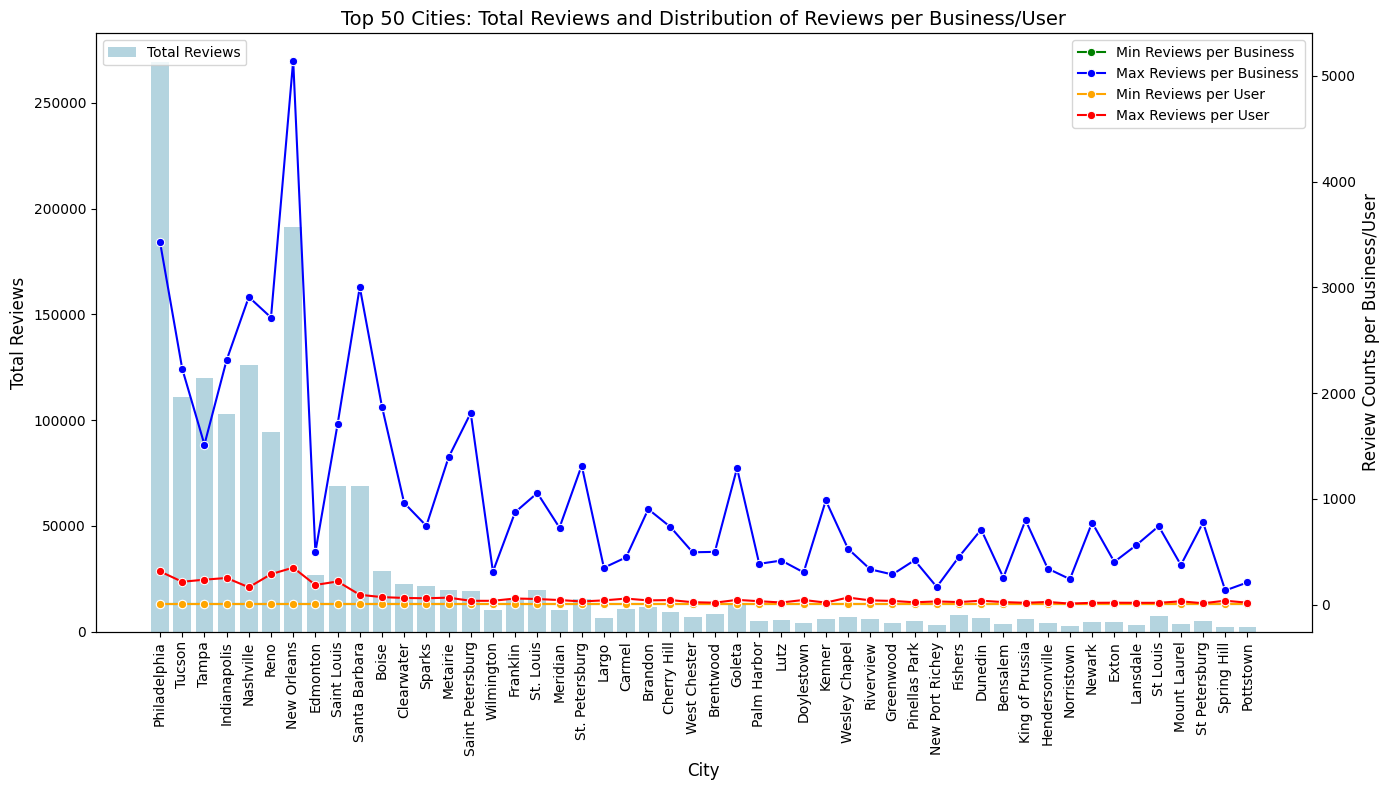

In [19]:

fig, ax1 = plt.subplots(figsize=(14, 8))

sns.barplot(
    x='city', y='total_review', data=top_50_cities, ax=ax1, color='lightblue', label='Total Reviews'
)
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Total Reviews', fontsize=12)
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

# Line plot for MIN/MAX reviews per business
sns.lineplot(
    x='city', y='MIN_REVIEWS_per_BUSINESS', data=top_50_cities, ax=ax2, color='green', label='Min Reviews per Business', marker='o'
)
sns.lineplot(
    x='city', y='MAX_REVIEWS_per_BUSINESS', data=top_50_cities, ax=ax2, color='blue', label='Max Reviews per Business', marker='o'
)

# Line plot for MIN/MAX reviews per user
sns.lineplot(
    x='city', y='MIN_REVIEWS_per_USER', data=top_50_cities, ax=ax2, color='orange', label='Min Reviews per User', marker='o'
)
sns.lineplot(
    x='city', y='MAX_REVIEWS_per_USER', data=top_50_cities, ax=ax2, color='red', label='Max Reviews per User', marker='o'
)

# Step 5: Set the y-axis label for ax2
ax2.set_ylabel('Review Counts per Business/User', fontsize=12)

# Step 6: Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add a title
plt.title('Top 50 Cities: Total Reviews and Distribution of Reviews per Business/User', fontsize=14)

# Adjust layout for readability
plt.tight_layout()

# Step 7: Display the plot
plt.show()


# Sparcity of the Reviews for the top 50 cities

The sparsity of text reviews typically refers to how many words or terms appear infrequently compared to the overall number of terms in the reviews. It can be thought of as a measure of how many unique terms exist in the dataset relative to the total number of terms. In text processing, sparsity is important because it can affect the performance of natural language processing (NLP) models.

- A higher sparsity value indicates that the reviews contain a lot of unique words that are infrequent, which could imply a rich diversity of expression but may also complicate modeling efforts.

- Conversely, a lower sparsity might indicate that many words are repeated frequently, which could suggest common themes or sentiments.


In [20]:
def calculate_sparsity(city, data):
    reviews = data[data['city'] == city]['text']  # Assuming there is a 'text' column for the reviews
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(reviews)
    
    num_unique_terms = len(vectorizer.get_feature_names_out())
    total_terms = X.sum()
    
    if total_terms > 0:  # To avoid division by zero
        sparsity = 1 - (num_unique_terms / total_terms)
    else:
        sparsity = 0  # Default sparsity if no terms
    
    return sparsity

# Compute sparsity for each city in the top 50
sparsity_values = {}
for city in top_50_cities['city']:
    sparsity_values[city] = calculate_sparsity(city, filtered_data)

# Add sparsity as a new column in the top 50 DataFrame
top_50_cities['sparsity'] = top_50_cities['city'].map(sparsity_values)



In [21]:
top_50_cities = top_50_cities.sort_values('sparsity', ascending=False).head(50)
top_50_cities

city  total_review  total_user  total_business   stars_x  \
0       Philadelphia        269432      126119            3253  3.823737   
6        New Orleans        191419      110230            1445  3.996280   
4          Nashville        126221       74507            1643  3.852663   
2              Tampa        120082       64218            2219  3.787745   
3       Indianapolis        103097       45289            1800  3.891898   
1             Tucson        111125       53218            2292  3.778997   
5               Reno         94255       48543            1449  3.814800   
8        Saint Louis         68885       37153            1087  3.943369   
9      Santa Barbara         68928       47567             915  4.023140   
7           Edmonton         26780        9705            1205  3.662136   
10             Boise         28743       17312             720  3.838152   
12            Sparks         21474       13321             421  3.621077   
17         St. Louis         19583       14143             322  3.834704   
11        Clearwater         22274       16057             544  3.753345   
13          Metairie         19500       12836             413  3.722564   
14  Saint Petersburg         19275       13692             395  4.003891   
16          Franklin         15497       10682             341  3.671162   
19    St. Petersburg         15203       11258             279  3.973426   
26            Goleta         13705       10242             180  3.788034   
22           Brandon         11592        7983             230  3.593254   
21            Carmel         10782        6670             236  3.851976   
18          Meridian         10144        6844             281  3.660883   
23       Cherry Hill          9331        6920             223  3.474654   
15        Wilmington         10427        7190             344  3.595569   
45          St Louis          7405        5937              99  3.805537   
36           Fishers          7621        5210             143  3.763942   
25         Brentwood          8174        6656             204  3.765109   
39   King of Prussia          6175        5021             117  3.534251   
31     Wesley Chapel          7016        4799             156  3.716648   
37           Dunedin          6653        4819             121  3.965880   
24      West Chester          7085        5128             216  3.736909   
32         Riverview          6191        4328             155  3.478275   
30            Kenner          6143        4943             156  3.524174   
20             Largo          6623        4984             247  3.719311   
28              Lutz          5267        4047             167  3.742928   
34     Pinellas Park          5236        4223             148  3.578113   
47     St Petersburg          4777        4067              97  3.718024   
43             Exton          4385        3277             100  3.356214   
27       Palm Harbor          5028        3851             169  3.696698   
42            Newark          4506        3582             101  3.578118   
33         Greenwood          4150        2853             152  3.504096   
46      Mount Laurel          3789        3097              99  3.405648   
38          Bensalem          3710        2823             117  3.307547   
40    Hendersonville          3917        2775             112  3.626500   
29        Doylestown          4179        3156             157  3.646327   
44          Lansdale          3294        2556             100  3.598664   
35   New Port Richey          3226        2402             144  3.605704   
41        Norristown          2738        2192             102  3.728634   
49         Pottstown          2313        1728              95  3.499351   
48       Spring Hill          1963        1430              95  3.567499   

    useful   funny    cool  avg_reviews_per_business  avg_review_per_users  \
0   342814  107689  153507                 82.825699         

# Analysis for the Chosen City

In [22]:
Philadelphia_reviews = filtered_data[filtered_data['city'] == 'Philadelphia']
Philadelphia_reviews

review_id                 user_id  \
223      AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
224      HME_ksGph3se7Aze5hxa-Q  kSMOJwJXuEUqzfmuFncK4A   
225      EJWyA5wpdVMji1j4TwSZqQ  mqBWACmaHflW4eh_Ofp16Q   
226      T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw   
227      NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA   
...                         ...                     ...   
1919405  2ZyE5Bb7F3n0ZJbBUq84Fw  qR9-0wG5UXeZEeAPGqIOtg   
1919406  kmkoryYi7p40cgAQlMDpEw  T6GsDqOOQwebHy7myrnisw   
1919407  OS6uhK1q6vuDWuXXY0FnkQ  DmneDtySqrp6NaXvDbRwQA   
1919408  wdNuuHU-etclGRwzNskAww  9YkdQop_BBykoCWZoGVZOg   
1919409  78wULmFbedTBoVVCWEWxpw  dZzPSh-ysxFymaJzObF81g   

                    business_id  stars_x  useful  funny  cool  \
223      kxX2SOes4o-D3ZQBkiMRfA        5       1      0     1   
224      kxX2SOes4o-D3ZQBkiMRfA        2       0      0     1   
225      kxX2SOes4o-D3ZQBkiMRfA        5      13      6     5   
226      kxX2SOes4o-D3ZQBkiMRfA        5       1      1     1   
227      kxX2SOes4o-D3ZQBkiMRfA        5       0      0     0   
...                         ...      ...     ...    ...   ...   
1919405  akNpPdFsHk0mvbqkmPrXWg        1       5      1     0   
1919406  akNpPdFsHk0mvbqkmPrXWg        5       0      0     0   
1919407  akNpPdFsHk0mvbqkmPrXWg        5       1      1     1   
1919408  akNpPdFsHk0mvbqkmPrXWg        5       1      0     0   
1919409  akNpPdFsHk0mvbqkmPrXWg        5       1      0     0   

                                                      text  \
223      Wow!  Yummy, different,  delicious.   Our favo...   
224      Dine-in gets 2 stars. Disappointing service & ...   
225      After a long hiatus from reviewing I have awak...   
226      We've eaten here 3 times and it seems that eac...   
227      Came to Philly for a family event but stayed a...   
...                                                    ...   
1919405  I don't usually write yelp reviews, but this i...   
1919406  Could not be happier with choosing SK. My heat...   
1919407  I cannot rate this company highly enough. Many...   
1919408  We woke up this morning to our heater making g...   
1919409  This is extremely delayed, but Saki was so goo...   

                       date                             name  ... postal_code  \
223     2015-01-04 00:01:03                            Zaika  ...       19114   
224     2014-07-13 17:25:47                            Zaika  ...       19114   
225     2010-08-20 19:16:04                            Zaika  ...       19114   
226     2017-01-02 14:25:26                            Zaika  ...       19114   
227     2015-07-28 17:15:20                            Zaika  ...       19114   
...                     ...                              ...  ...         ...   
1919405 2019-02-06 13:54:29  SK Heating and Air Conditioning  ...       19130   
1919406 2018-12-31 14:11:04  SK Heating and Air Conditioning  ...       19130   
1919407 2017-06-17 14:55:11  SK Heating and Air Conditioning  ...       19130   
1919408 2016-02-10 03:14:23  SK Heating and Air Conditioning  ...       19130   
1919409 2018-05-21 14:21:54  SK Heating and Air Conditioning  ...       19130   

          latitude  longitude stars_y  review_count  is_open  \
223      40.079848 -75.025080     4.0           181        1   
224      40.079848 -75.025080     4.0           181        1   
225      40.079848 -75.025080     4.0           181        1   
226      40.079848 -75.025080     4.0           181        1   
227      40.079848 -75.025080     4.0           181        1   
...            ...        ...     ...           ...      ...   
1919405  39.968261 -75.174967     5.0           148        1   
1919406  39.968261 -75.174967     5.0           148        1   
1919407  39.968261 -75.174967     5.0           148        1   
1919408  39.968261 -75.174967     5.0           148        1   
1919409  39.968261 -75.174967     5.0           148        1   

                                             

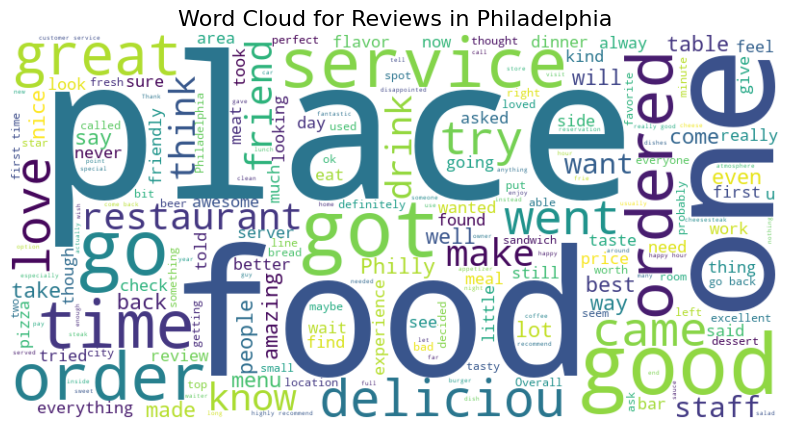

In [23]:

city_text = ' '.join(Philadelphia_reviews['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(city_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud for Reviews in Philadelphia', fontsize=16)
plt.show()


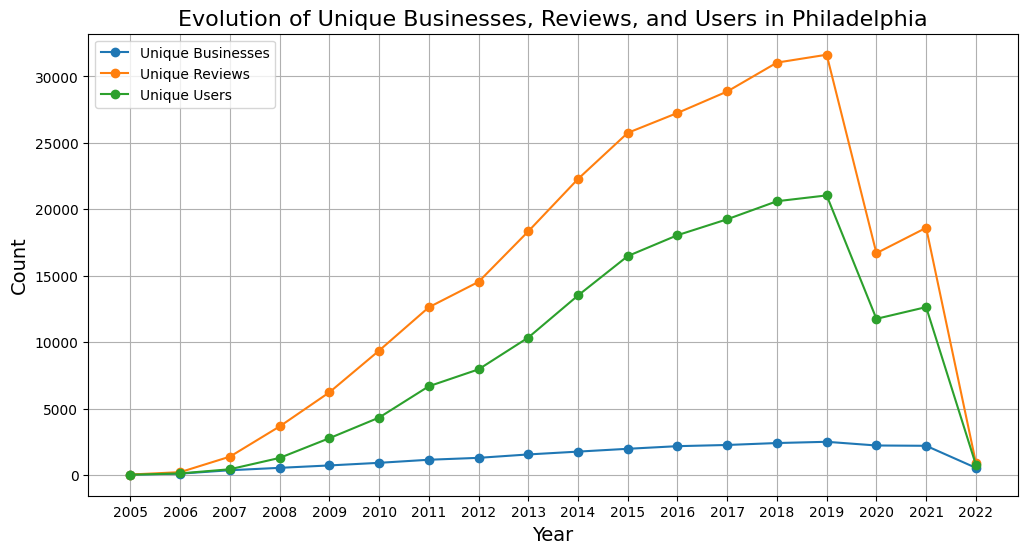

In [24]:
city_name = 'Philadelphia'
city_data = filtered_data[filtered_data['city'] == city_name]

evolution_data = city_data.groupby('year').agg(
    unique_businesses=('business_id', pd.Series.nunique),
    unique_reviews=('review_id', pd.Series.nunique),
    unique_users=('user_id', pd.Series.nunique)
).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(evolution_data['year'], evolution_data['unique_businesses'], marker='o', label='Unique Businesses')
plt.plot(evolution_data['year'], evolution_data['unique_reviews'], marker='o', label='Unique Reviews')
plt.plot(evolution_data['year'], evolution_data['unique_users'], marker='o', label='Unique Users')

plt.title(f'Evolution of Unique Businesses, Reviews, and Users in {city_name}', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(evolution_data['year'])  # Show all years on x-axis
plt.legend()
plt.grid(True)
plt.show()


In [25]:
Philadelphia_summary = top_50_cities[top_50_cities['city'] == 'Philadelphia']
Philadelphia_summary

city  total_review  total_user  total_business   stars_x  useful  \
0  Philadelphia        269432      126119            3253  3.823737  342814   

    funny    cool  avg_reviews_per_business  avg_review_per_users  ...  \
0  107689  153507                 82.825699              2.136332  ...   

   COUNT_REVIEWS_per_BUSINESS  MIN_REVIEWS_per_USER  MAX_REVIEWS_per_USER  \
0                        3253                     1                   313   

   MEDIAN_REVIEWS_per_USER  MEAN_REVIEWS_per_USER  STD_REVIEWS_per_USER  \
0                      1.0               2.136332              4.526923   

   SUM_REVIEWS_per_USER  VARIANCE_REVIEWS_per_USER  COUNT_REVIEWS_per_USER  \
0                269432                   20.49303                  126119   

   sparsity  
0  0.996113  

[1 rows x 27 columns]

In [26]:
if not Philadelphia_summary.empty:

    Philadelphia_metrics = Philadelphia_summary.iloc[0]  # Get the first (and presumably only) row
    print("Summary for Philadelphia City:")
    print(f"Total Reviews: {Philadelphia_metrics['total_review']}")
    print(f"Total Users: {Philadelphia_metrics['total_user']}")
    print(f"Total Businesses: {Philadelphia_metrics['total_business']}")
    print(f"Average Stars: {Philadelphia_metrics['stars_x']:.2f}")
    print(f"Average Reviews per Business: {Philadelphia_metrics['avg_reviews_per_business']:.2f}")
    print(f"Average Reviews per User: {Philadelphia_metrics['avg_review_per_users']:.2f}")
    print(f"Minimum Reviews per Business: {Philadelphia_metrics['MIN_REVIEWS_per_BUSINESS']}")
    print(f"Maximum Reviews per Business: {Philadelphia_metrics['MAX_REVIEWS_per_BUSINESS']}")
    print(f"Minimum Reviews per User: {Philadelphia_metrics['MIN_REVIEWS_per_USER']}")
    print(f"Maximum Reviews per User: {Philadelphia_metrics['MAX_REVIEWS_per_USER']}")
    print(f"Sparsity: {Philadelphia_metrics['sparsity']:.4f}")
else:
    print("Philadelphia City data not found in the top 50 cities.")


Summary for Philadelphia City:
Total Reviews: 269432
Total Users: 126119
Total Businesses: 3253
Average Stars: 3.82
Average Reviews per Business: 82.83
Average Reviews per User: 2.14
Minimum Reviews per Business: 5
Maximum Reviews per Business: 3428
Minimum Reviews per User: 1
Maximum Reviews per User: 313
Sparsity: 0.9961


In [27]:
#Philadelphia_reviews = Philadelphia_reviews[Philadelphia_reviews['year'] >= 2020]

In [28]:
grouped_data = Philadelphia_reviews.groupby(['name', 'latitude', 'longitude','categories']).agg(
    stars=('stars_x', 'mean'),  # Calculate average of stars
    review_count=('review_id', 'count')  # Count of review IDs
).reset_index()

grouped_data

name   latitude  longitude  \
0                 Joe's Throwback Barber Shop  40.042395 -75.226518   
1     "No Macarena" DJ & Custom Music Service  40.070333 -75.207064   
2                             &pizza - Walnut  39.949207 -75.165920   
3                          1 Stop Mini Market  39.941402 -75.155952   
4                                1 Stop Pizza  40.009383 -75.150662   
...                                       ...        ...        ...   
3245                         vybe urgent care  39.934951 -75.167171   
3246                         vybe urgent care  39.950700 -75.151414   
3247                         vybe urgent care  39.962594 -75.164040   
3248                                 west elm  39.950638 -75.163154   
3249                       willow + june hair  40.035794 -75.218028   

                                             categories     stars  \
0                                Beauty & Spas, Barbers  4.764706   
1                        Event Planning & Services, DJs  4.826087   
2                 Pizza, Vegetarian, Restaurants, Vegan  4.365285   
3                              Food, Convenience Stores  4.833333   
4     Food, Grocery, Burgers, Pizza, Restaurants, It...  3.375000   
...                                                 ...       ...   
3245  Urgent Care, Diagnostic Imaging, Diagnostic Se...  3.303030   
3246  Health & Medical, Urgent Care, Medical Centers...  2.909091   
3247  Urgent Care, Health & Medical, Walk-in Clinics...  3.083333   
3248  Home & Garden, Furniture Stores, Rugs, Shoppin...  2.615385   
3249  Beauty & Spas, Hair Extensions, Makeup Artists...  5.000000   

      review_count  
0               17  
1               23  
2              386  
3                6  
4                8  
...            ...  
3245            33  
3246            11  
3247            12  
3248            78  
3249            24  

[3250 rows x 6 columns]

In [29]:
Philadelphia_reviews = Philadelphia_reviews[Philadelphia_reviews['categories'].str.contains('Restaurant.*')==True].reset_index()

In [30]:

Philadelphia_reviews

index               review_id                 user_id  \
0           223  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ   
1           224  HME_ksGph3se7Aze5hxa-Q  kSMOJwJXuEUqzfmuFncK4A   
2           225  EJWyA5wpdVMji1j4TwSZqQ  mqBWACmaHflW4eh_Ofp16Q   
3           226  T_kAb2NeylB-JdNDKphryw  Z-xgVb4nM42943m2wbBkFw   
4           227  NENaCqb6TNj5CyY1LOdI6Q  2SEoXb6r6hPKrl9V9VzBgA   
...         ...                     ...                     ...   
192168  1919253  vhBcCpdKGpo8SvBe-J3J0Q  8EMU7d4pCkdqUnvlIW40CA   
192169  1919254  6Ea7BVLixQcv7LZp7_5R7g  w7VM27a9vuJeZ-ivpb9Mfw   
192170  1919255  3HhZYnoSBnSki7o2V33VLQ  yIsQ4qFCyY-clmlRwQlw_w   
192171  1919256  cNI93lTmhKPKhG1JhoyRNA  GEyLSyZHIeUq7sy2uIBe1Q   
192172  1919257  xwH4kYTDByClxBHNORwBsg  rcd80shztmaJTureerehmg   

                   business_id  stars_x  useful  funny  cool  \
0       kxX2SOes4o-D3ZQBkiMRfA        5       1      0     1   
1       kxX2SOes4o-D3ZQBkiMRfA        2       0      0     1   
2       kxX2SOes4o-D3ZQBkiMRfA        5      13      6     5   
3       kxX2SOes4o-D3ZQBkiMRfA        5       1      1     1   
4       kxX2SOes4o-D3ZQBkiMRfA        5       0      0     0   
...                        ...      ...     ...    ...   ...   
192168  7pwZZVVlYCxQvVdd8Q03wg        3       9      5     7   
192169  7pwZZVVlYCxQvVdd8Q03wg        5       0      0     0   
192170  7pwZZVVlYCxQvVdd8Q03wg        5       1      1     1   
192171  7pwZZVVlYCxQvVdd8Q03wg        4       2      0     0   
192172  7pwZZVVlYCxQvVdd8Q03wg        1       2      0     0   

                                                     text                date  \
0       Wow!  Yummy, different,  delicious.   Our favo... 2015-01-04 00:01:03   
1       Dine-in gets 2 stars. Disappointing service & ... 2014-07-13 17:25:47   
2       After a long hiatus from reviewing I have awak... 2010-08-20 19:16:04   
3       We've eaten here 3 times and it seems that eac... 2017-01-02 14:25:26   
4       Came to Philly for a family event but stayed a... 2015-07-28 17:15:20   
...                                                   ...                 ...   
192168  Directly above the Snyder Avenue subway stop i... 2019-10-16 14:24:24   
192169  Perfectly cooked, every. damn. time. No questi... 2021-04-11 21:22:35   
192170  I just found my new favorite pizza place in Ph... 2012-09-24 16:55:31   
192171  Just love this square old style pizza amazing ... 2019-05-16 21:42:28   
192172  Guess I should've read the reviews saying this... 2013-04-21 21:09:49   

        ... postal_code   latitude  longitude stars_y review_count  is_open  \
0       ...       19114  40.079848 -75.025080     4.0          181        1   
1       ...       19114  40.079848 -75.025080     4.0          181        1   
2       ...       19114  40.079848 -75.025080     4.0          181        1   
3       ...       19114  40.079848 -75.025080     4.0          181        1   
4       ...       19114  40.079848 -75.025080     4.0          181        1   
...     ...         ...        ...        ...     ...          ...      ...   
192168  ...       19145  39.924147 -75.170077     4.0          152        1   
192169  ...       19145  39.924147 -75.170077     4.0          152        1   
192170  ...       19145  39.924147 -75.170077     4.0          152        1   
192171  ...       19145  39.924147 -75.170077     4.0          152        1   
192172  ...       19145  39.924147 -75.170077     4.0          152        1   

                                               attributes  \
0       {'Caters': 'True', 'Ambience': "{'romantic': F...   
1       {'Caters': 'True', 'Ambience': "{'romantic': F...   
2       {'Caters': 'True', 'Ambience': "{'romantic': F...   
3       {'Caters': 'True', 'Ambience': "{'romantic': F...   
4       {'Caters': 'True', 'Ambience': "{'romantic': F...   
...                                                   ...   
192168  {'RestaurantsTakeOut': 'True', 'RestaurantsRes...   
192169  {'RestaurantsTakeO

In [31]:
Philadelphia_reviews.columns

Index(['index', 'review_id', 'user_id', 'business_id', 'stars_x', 'useful',
       'funny', 'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'year'],
      dtype='object')

In [32]:
Philadelphia_reviews = Philadelphia_reviews[
    ['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny', 'cool', 
     'text', 'date', 'name', 'address', 'city', 'state', 'attributes', 'categories','latitude', 'longitude','is_open']
]

Philadelphia_reviews = Philadelphia_reviews.rename(columns={'stars_x': 'stars'})
Philadelphia_reviews['stars'] = Philadelphia_reviews['stars'].round(2)

grouped_data['stars'] = grouped_data['stars'].round(2)

In [33]:
Philadelphia_reviews = Philadelphia_reviews.rename(columns={
    'name': 'restaurant_name'
})

In [34]:
Philadelphia_reviews.to_csv('/Users/mac/Downloads/ADC-MECD/data/Philadelphia_reviews.csv', index = False)

In [35]:
# Create a base map centered around Philadelphia
map_center = [39.9526, -75.1652]
m = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add markers to the map
for _, row in grouped_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['review_count'] * 0.5, 
        color='blue',  
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(f"{row['name']}<br>Average Stars: {row['stars']}<br>Reviews: {row['review_count']}", parse_html=True)
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('philadelphia_restaurants_map.html')
m

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Restaurants'),
  Text(1, 0, 'Nightlife'),
  Text(2, 0, 'Bars'),
  Text(3, 0, 'Food'),
  Text(4, 0, 'Breakfast & Brunch'),
  Text(5, 0, 'American (New)'),
  Text(6, 0, 'American (Traditional)'),
  Text(7, 0, 'Sandwiches'),
  Text(8, 0, 'Italian'),
  Text(9, 0, 'Coffee & Tea'),
  Text(10, 0, 'Pizza'),
  Text(11, 0, 'Cheesesteaks'),
  Text(12, 0, 'Cafes'),
  Text(13, 0, 'Seafood'),
  Text(14, 0, 'Vegetarian'),
  Text(15, 0, 'Mexican'),
  Text(16, 0, 'Burgers'),
  Text(17, 0, 'Pubs'),
  Text(18, 0, 'Chinese'),
  Text(19, 0, 'Event Planning & Services')])

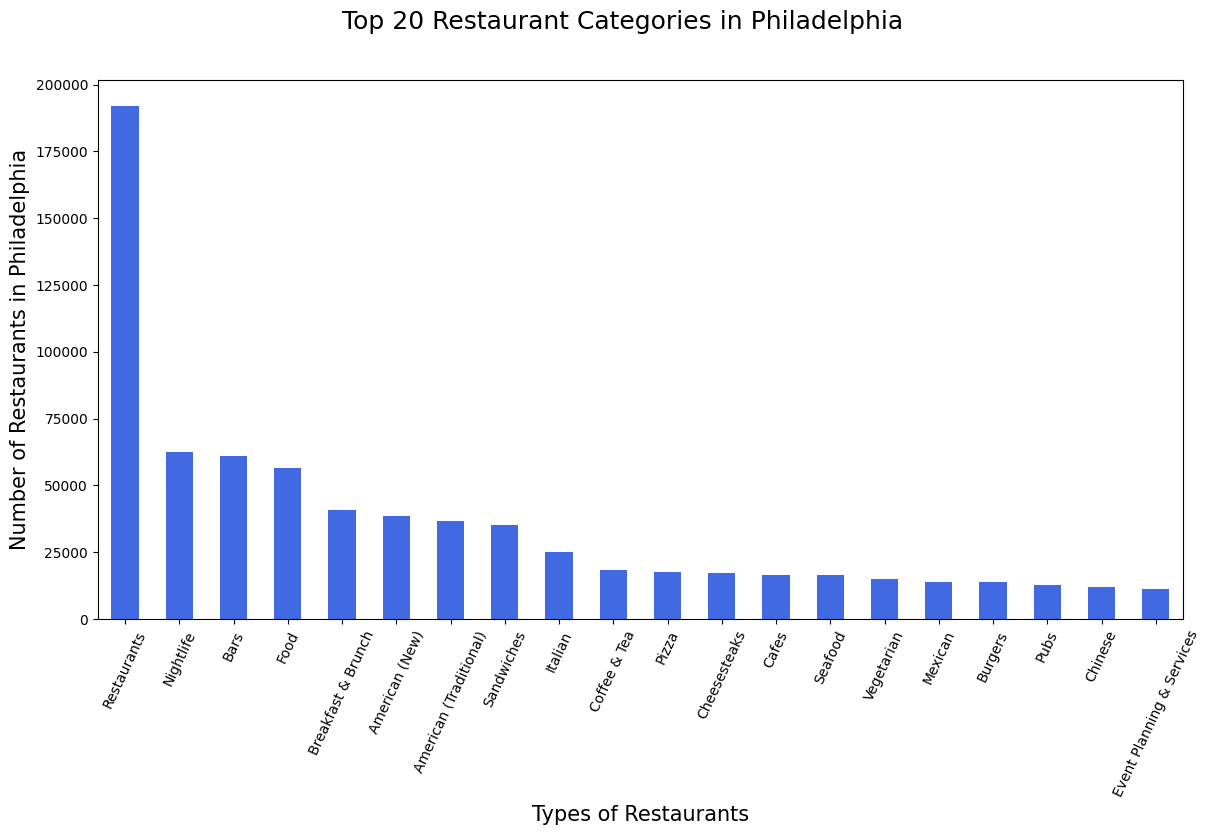

In [36]:
restaurant_categories = Philadelphia_reviews.assign(categories = Philadelphia_reviews.categories.str.split(', ')).explode('categories')
top25_categories = restaurant_categories.categories.value_counts().head(20)

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Top 20 Restaurant Categories in Philadelphia', fontsize=18)

top25_categories.plot(kind = 'bar', color = 'royalblue')

plt.ylabel('Number of Restaurants in Philadelphia', fontsize=15)
plt.xlabel('Types of Restaurants', fontsize=15)
plt.xticks(rotation=65)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Bars'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Breakfast & Brunch'),
  Text(3, 0, 'American (New)'),
  Text(4, 0, 'American (Traditional)'),
  Text(5, 0, 'Sandwiches'),
  Text(6, 0, 'Italian'),
  Text(7, 0, 'Coffee & Tea'),
  Text(8, 0, 'Pizza'),
  Text(9, 0, 'Cheesesteaks'),
  Text(10, 0, 'Cafes'),
  Text(11, 0, 'Seafood'),
  Text(12, 0, 'Vegetarian'),
  Text(13, 0, 'Mexican'),
  Text(14, 0, 'Burgers'),
  Text(15, 0, 'Pubs'),
  Text(16, 0, 'Chinese'),
  Text(17, 0, 'Event Planning & Services')])

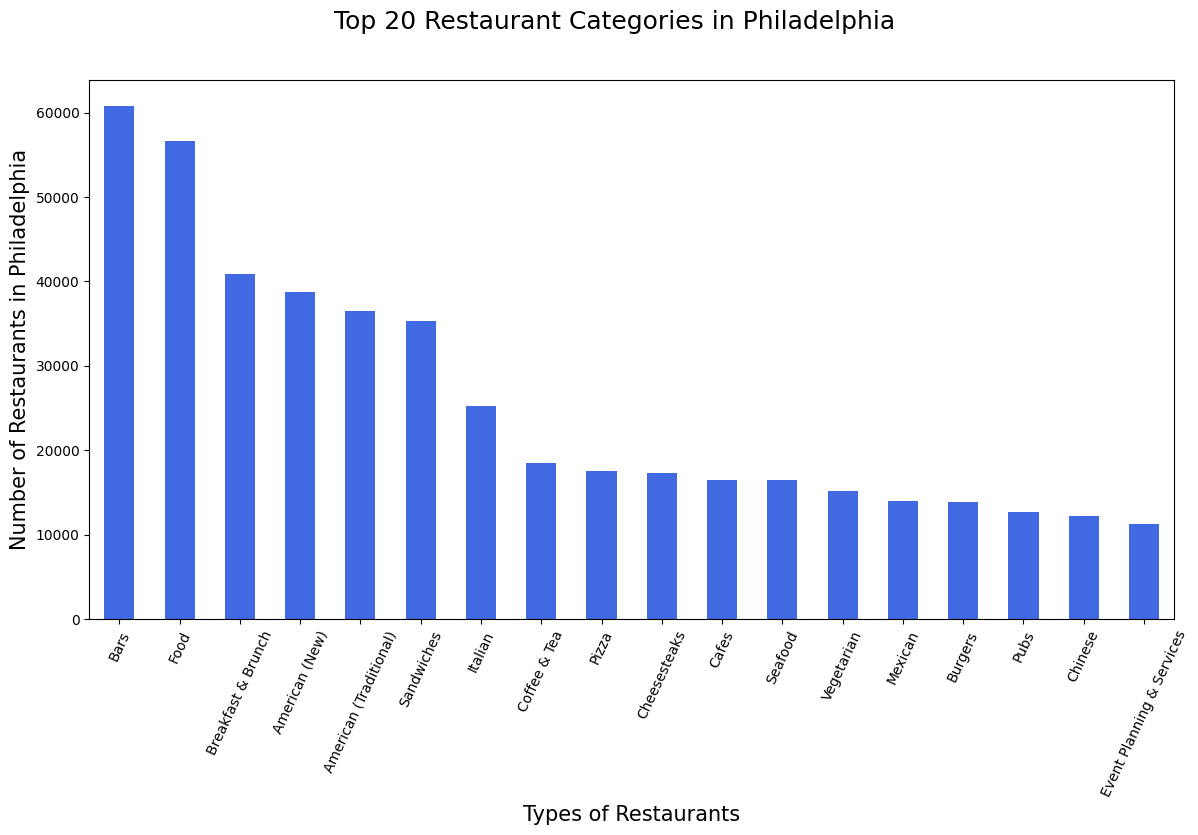

In [37]:
restaurant_categories = Philadelphia_reviews.assign(categories = Philadelphia_reviews.categories.str.split(', ')).explode('categories')
top25_categories = restaurant_categories.categories.value_counts().head(20)

fig, ax = plt.subplots(figsize=(14, 7))
fig.suptitle('Top 20 Restaurant Categories in Philadelphia', fontsize=18)

top25_categories[2:].plot(kind = 'bar', color = 'royalblue')

plt.ylabel('Number of Restaurants in Philadelphia', fontsize=15)
plt.xlabel('Types of Restaurants', fontsize=15)
plt.xticks(rotation=65)

In [38]:
Philadelphia_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'restaurant_name', 'address', 'city', 'state',
       'attributes', 'categories', 'latitude', 'longitude', 'is_open'],
      dtype='object')

/var/folders/mc/n_js9n3s5m19y777fgrpry1w0000gn/T/ipykernel_16473/4169841795.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='restaurant_name', data=top_20_restaurants, palette='Blues_d')


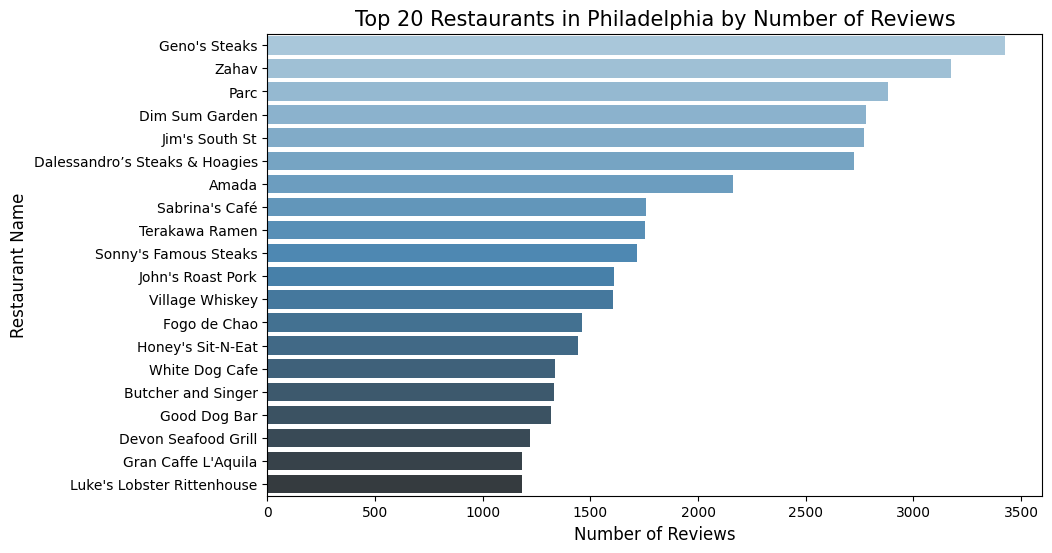

In [39]:
# 1. Top 20 Restaurants by Reviews
top_restaurants_philadelphia = Philadelphia_reviews.groupby('business_id').agg(
    restaurant_name=('restaurant_name', 'first'),  
    review_count=('review_id', 'count')
).reset_index()

# Sort by review_count and select top 20 restaurants
top_20_restaurants = top_restaurants_philadelphia.sort_values('review_count', ascending=False).head(20)

# Plotting the top 20 restaurants by review count
plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='restaurant_name', data=top_20_restaurants, palette='Blues_d')
plt.title('Top 20 Restaurants in Philadelphia by Number of Reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.show()

/var/folders/mc/n_js9n3s5m19y777fgrpry1w0000gn/T/ipykernel_16473/3155254265.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='user_id', data=top_20_users, palette='Greens_d')


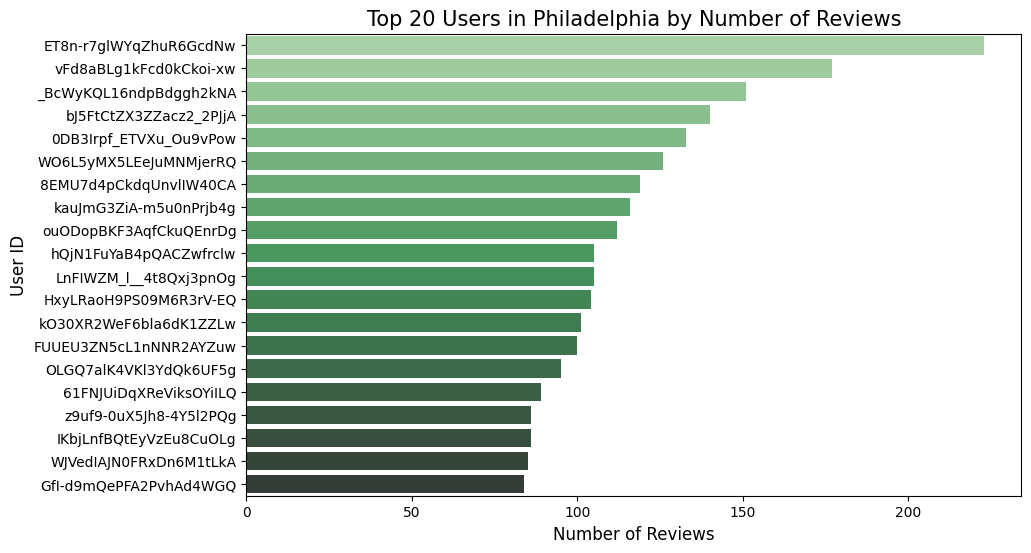

In [40]:
# 2. Top Users by Number of Reviews
top_users_philadelphia = Philadelphia_reviews.groupby('user_id').agg(
    review_count=('review_id', 'count')
).reset_index()

# Sort by review_count and select top users (e.g., top 20 users)
top_20_users = top_users_philadelphia.sort_values('review_count', ascending=False).head(20)

# Plotting the top 20 users by review count
plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='user_id', data=top_20_users, palette='Greens_d')
plt.title('Top 20 Users in Philadelphia by Number of Reviews', fontsize=15)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('User ID', fontsize=12)
plt.show()

/var/folders/mc/n_js9n3s5m19y777fgrpry1w0000gn/T/ipykernel_16473/3481485693.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(top_restaurants_philadelphia['review_count'])


Text(0, 0.5, 'Number of Restaurants')

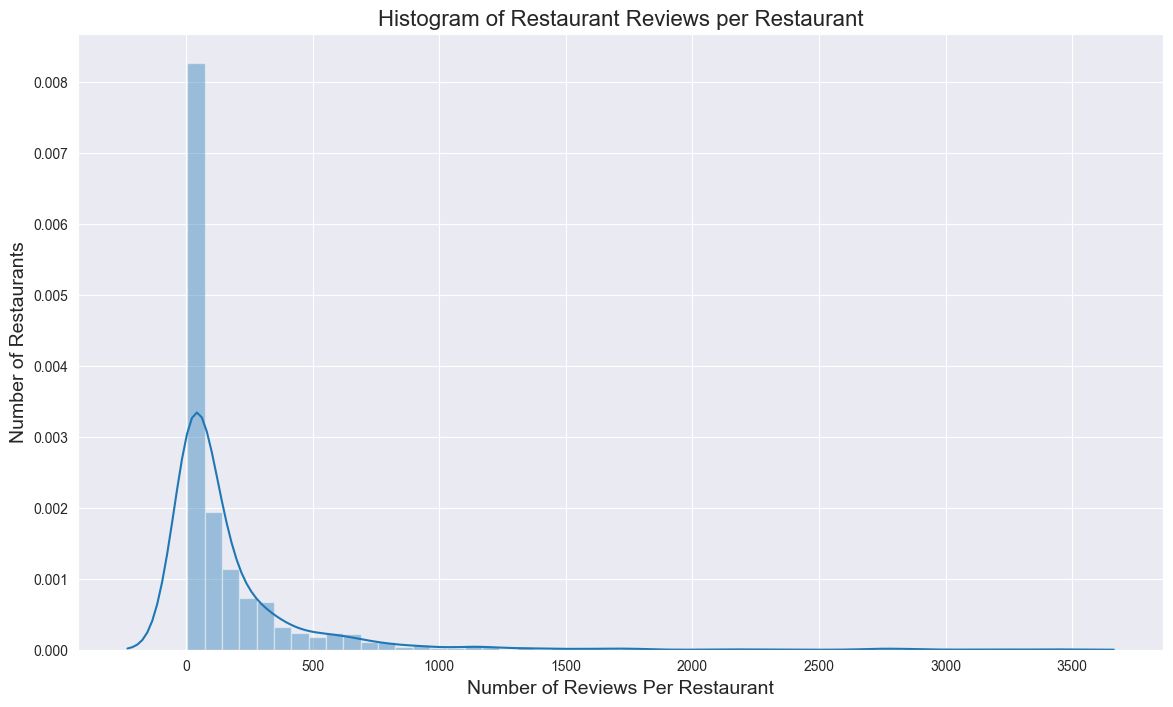

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(top_restaurants_philadelphia['review_count'])
plt.title('Histogram of Restaurant Reviews per Restaurant', fontsize = 16)
plt.xlabel('Number of Reviews Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)